In [1]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [2]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [4]:
path = Path('bearsHS')

In [5]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.531419,0.038919,0.000000,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.180445,0.043086,0.011494,00:15
1,0.128487,0.056372,0.011494,00:16
2,0.095015,0.068258,0.022989,00:15
3,0.077836,0.072441,0.022989,00:15


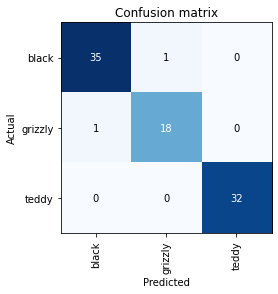

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [8]:
learn.export()

In [9]:
learn.export()

In [10]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [13]:
learn_inf = load_learner(path/'export.pkl')

In [14]:
btn_upload = widgets.FileUpload()

In [18]:
out_pl = widgets.Output()

In [15]:
lbl_pred = widgets.Label()

In [16]:
btn_run = widgets.Button(description='Classify')

In [17]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [19]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])